In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [5]:
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]

In [6]:
model = models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
epochs = 5
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")

Epoch 1/5
106/106 - 4s - loss: 2.7855 - accuracy: 0.6472 - val_loss: 0.5960 - val_accuracy: 0.8302 - 4s/epoch - 37ms/step
Epoch 2/5
106/106 - 1s - loss: 0.5075 - accuracy: 0.8559 - val_loss: 0.3852 - val_accuracy: 0.8892 - 1s/epoch - 14ms/step
Epoch 3/5
106/106 - 1s - loss: 0.3505 - accuracy: 0.8968 - val_loss: 0.3122 - val_accuracy: 0.9108 - 1s/epoch - 13ms/step
Epoch 4/5
106/106 - 1s - loss: 0.2663 - accuracy: 0.9223 - val_loss: 0.2761 - val_accuracy: 0.9232 - 1s/epoch - 13ms/step
Epoch 5/5
106/106 - 2s - loss: 0.2173 - accuracy: 0.9354 - val_loss: 0.2363 - val_accuracy: 0.9327 - 2s/epoch - 14ms/step
Finished fitting.


Text(0, 0.5, 'Accuracy')

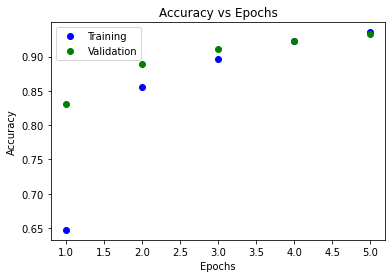

In [11]:
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [12]:
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()

Checking accuracy on test set...
20/20 [==============================] - 0s 8ms/step - loss: 0.2513 - accuracy: 0.9287

Accuracy on test set: 0.9286999702453613
